# 01: Fits

In [1]:
import SMEFT19
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from flavio.statistics.functions import pull

## Scenario I
Fit only to `C`, `beta_l` and `beta_q`

In [2]:
def fit(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBI)

In [3]:
bf, v, d, L = SMEFT19.ellipse.minimum(fit, [-0.117, 0, 0.751])

Minimizing...
Pull: 6.010749377042299 sigma


In [4]:
bf

array([-1.28804442e-01, -4.17600643e-07,  8.14892465e-01])

In [5]:
-2*L

43.58734106388118

In [6]:
SMEFT19.ellipse.save(bf, v, d, L, '../data/ellipses/rotBI.yaml', name='Mass Rotation fit, Scenario I',
                     fit='rotBI')

### Confidence intervals scenario I

In [7]:
dchi = SMEFT19.SMEFTglob.smelli.flavio.statistics.functions.delta_chi2(1,3)
dchi

3.5267403802617303

In [8]:
delta_C = []
for err in np.linspace(-0.10, 0.10, 20):
    delta_C.append(fit(np.array(bf) + np.array([err,0,0]))-L)

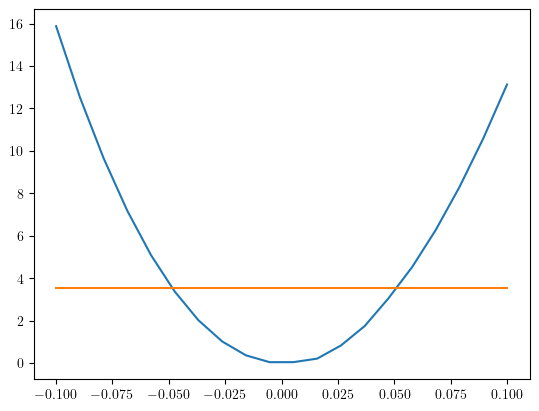

In [9]:
plt.plot(np.linspace(-0.10, 0.10, 20), delta_C)
plt.plot([-0.1, 0.1], [dchi,dchi])

**Error in C:** $\pm 0.05$ 

In [10]:
delta_bl = []
for err in np.linspace(-0.1, 0.1, 20):
    delta_bl.append(fit(np.array(bf) - np.array([0,err,0]))-L)

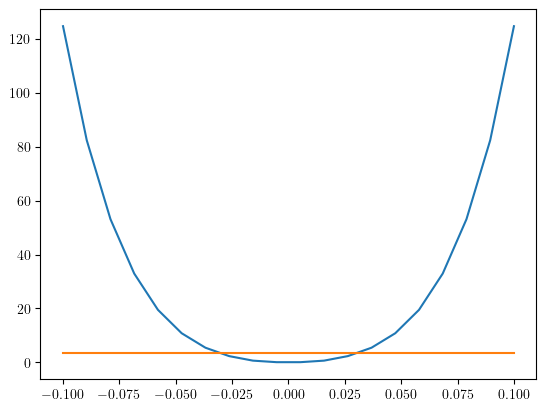

In [11]:
plt.plot(np.linspace(-0.1, 0.1, 20), delta_bl)
plt.plot([-0.1, 0.1], [dchi, dchi])

**Error in $\beta^\ell$:** $\pm 0.025$

In [12]:
delta_bq = []
for err in np.linspace(-2.0, 2.0, 20):
    delta_bq.append(fit(np.array(bf) + np.array([0,0,err]))-L)

(-1.0, 2.0)

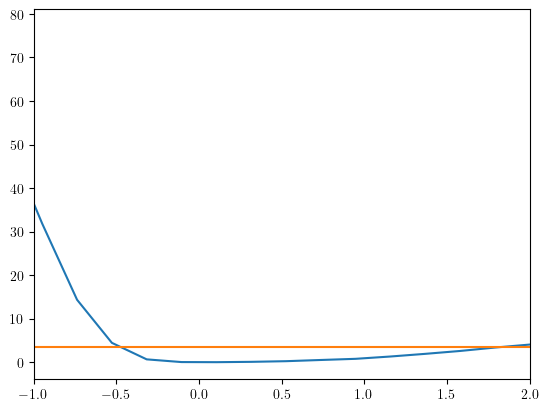

In [13]:
plt.plot(np.linspace(-2, 2, 20), delta_bq)
plt.plot([-2, 2], [dchi, dchi])
plt.xlim([-1,2])

**Error in $\beta^q$:** ${}^{+1.7}_{-0.5}$

## Scenario II
Fit to all parameters

In [2]:
def fit2(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBII)

In [4]:
from iminuit import Minuit

m = Minuit(fit2, [-0.128, 0, 0, 0, 0.81])
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -23.25                     │              Nfcn = 44               │
│ EDM = 0.0924 (Goal: 0.1)         │           time = 277.5 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│ NO Covariance │     Hesse ok     │APPROXIMATE│NOT pos. def.│ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  -0.1278  │  0.0011   │            │            │         │         │       │
│ 1 │ x1   │   0.030   │   0.032   │            │            │         │         │       │
│ 2 │ x2   │  -0.001   │   0.021   │            │            │         │         │       │
│ 3 │ x3   │  -0.058   │   0.028   │            │            │         │         │       │
│ 4 │ x4   │   0.816   │   0.011   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [5]:
bf2, v2, d2, L2 = SMEFT19.ellipse.minimum(fit2, [-0.1278, 0.030, -0.001, -0.058, 0.816])

Minimizing...
Pull: 5.791238335450828 sigma


In [6]:
bf2

array([-1.32284702e-01,  3.17441192e-02, -1.91839371e-05, -5.68394790e-02,
        7.49809717e-01])

In [7]:
-2*L2

46.559250149924615

In [8]:
SMEFT19.ellipse.save(bf2, v2, d2, L2, '../data/ellipses/rotBII.yaml', name='Mass Rotation fit, Scenario II',
                     fit='rotBII')

### Confidence intervals scenario II

In [9]:
dchi = SMEFT19.SMEFTglob.smelli.flavio.statistics.functions.delta_chi2(1,5)
dchi

5.887595445915204

In [11]:
delta_C = []
for err in np.linspace(-0.10, 0.10, 20):
    delta_C.append(fit2(np.array(bf2) + np.array([err,0,0,0,0]))-L2)

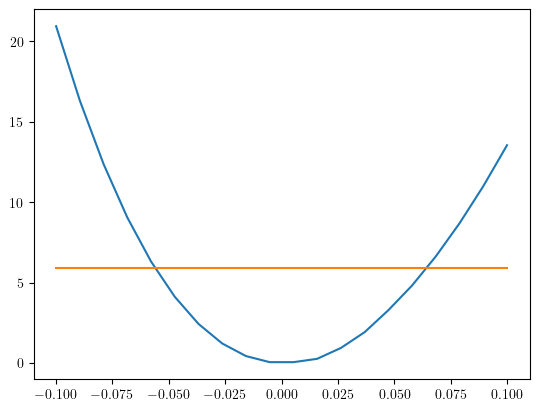

In [12]:
plt.plot(np.linspace(-0.10, 0.10, 20), delta_C)
plt.plot([-0.1, 0.1], [dchi, dchi])

**Error in C:** $\pm 0.06$

In [13]:
delta_al = []
for err in np.linspace(-0.07, 0.07, 20):
    delta_al.append(fit2(np.array(bf2) + np.array([0,err,0,0,0]))-L2)

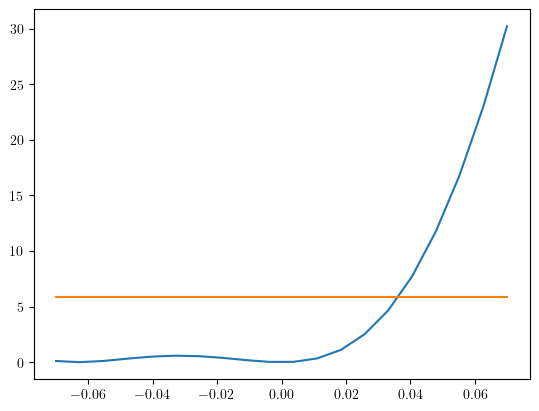

In [14]:
plt.plot(np.linspace(-0.07, 0.07, 20), delta_al)
plt.plot([-0.07, 0.07], [dchi, dchi])

**Error in $\alpha^\ell$:** ${}_{-0.07}^{+0.04}$

In [15]:
delta_bl = []
for err in np.linspace(-0.06, 0.06, 20):
    delta_bl.append(fit2(np.array(bf2) - np.array([0,0,err,0,0]))-L2)

(-10.0, 80.0)

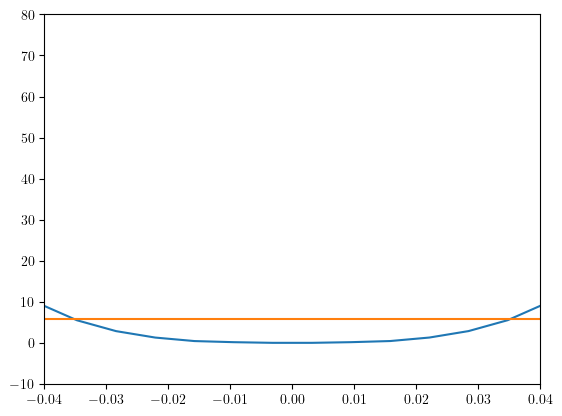

In [16]:
plt.plot(np.linspace(-0.06, 0.06, 20), delta_bl)
plt.plot([-0.06, 0.06], [dchi, dchi])
plt.xlim([-0.04, 0.04])
plt.ylim([-10, 80])

**Error in $\beta^\ell$:** $\pm0.025$

In [17]:
delta_aq = []
for err in np.linspace(-0.15, 0.07, 20):
    delta_aq.append(fit2(np.array(bf2) - np.array([0,0,0,err,0]))-L2)

(-0.12, 0.07)

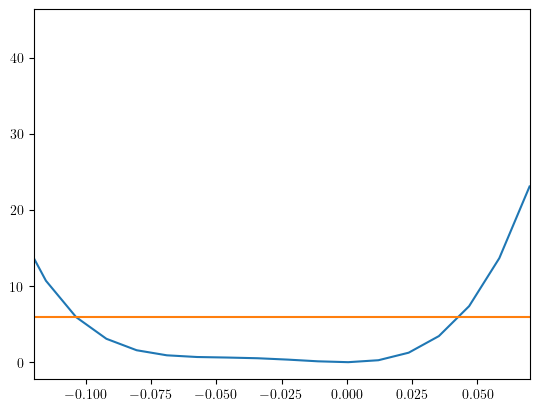

In [18]:
plt.plot(np.linspace(-0.15, 0.07, 20), delta_aq)
plt.plot([-0.15, 0.07], [dchi, dchi])
plt.xlim([-0.12, 0.07])

**Error in $\alpha^q$:** ${}_{-0.07}^{+0.12}$

In [20]:
delta_bq = []
for err in np.linspace(-0.7, 2.8, 20):
    delta_bq.append(fit2(np.array(bf2) + np.array([0,0,0,0,err]))-L2)

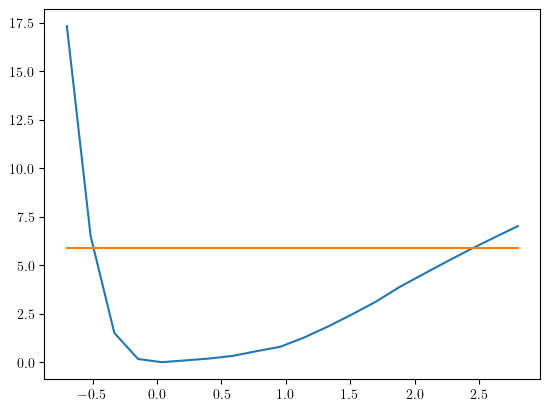

In [21]:
plt.plot(np.linspace(-0.7, 2.8, 20), delta_bq)
plt.plot([-0.7,2.8], [dchi, dchi])

**Error in $\beta^q$:** ${}^{+2.8}_{-0.6}$

In [24]:
pull(2*(L-L2), 2)

1.2099808594154755

### Matrix $\lambda^\ell$

In [25]:
SMEFT19.scenarios.idemp(bf2[1], bf2[2])

matrix([[ 1.00667469e-03, -6.08364142e-07,  3.17121632e-02],
        [-6.08364142e-07,  3.67652961e-10, -1.91646251e-05],
        [ 3.17121632e-02, -1.91646251e-05,  9.98993325e-01]])

In [26]:
al = np.random.uniform(0, 0.11, 200)
bl = np.random.uniform(-0.025, 0.025, 200)

In [27]:
ll = []
for i in range(200):
    ll.append(SMEFT19.scenarios.idemp(al[i], bl[i]))

In [28]:
np.std(ll, axis=0)

array([[0.00356884, 0.00094267, 0.03024226],
       [0.00094267, 0.00019246, 0.01426439],
       [0.03024226, 0.01426439, 0.00358462]])

### Matrix $\lambda^q$

In [29]:
SMEFT19.scenarios.idemp(bf2[3], bf2[4])

matrix([[ 0.00206377, -0.02722471, -0.03630882],
        [-0.02722471,  0.35914037,  0.47897534],
        [-0.03630882,  0.47897534,  0.63879586]])

In [30]:
aq = np.random.uniform(bf2[3]-0.07, bf2[3]+0.12, 200)
bq = np.random.uniform(bf2[4]-0.6, bf2[4]+2.8, 200)

In [31]:
lq = []
for i in range(200):
    lq.append(SMEFT19.scenarios.idemp(aq[i], bq[i]))

In [32]:
np.std(lq, axis=0)

array([[0.00195725, 0.02157906, 0.02495195],
       [0.02157906, 0.27539174, 0.08177364],
       [0.02495195, 0.08177364, 0.27451154]])

### Wilson coefficients

In [33]:
w = SMEFT19.scenarios.rotBII(bf2)
w2 = w.match_run(eft='WET', basis='flavio', scale=4.8)

In [34]:
C9 = w2.values['C9_bsmumu']['Re']
C10 = w2.values['C10_bsmumu']['Re']
C9e = w2.values['C9_bsee']['Re']
C10e = w2.values['C10_bsee']['Re']
Ctau = w2.values['CVL_bctaunutau']['Re']
print(f'C9e = {C9e}')
print(f'C10e = {C10e}')
print(f'C9mu = {C9}')
print(f'C10mu = {C10}')
print(f'CVLtau = {Ctau}')

C9e = -0.5923074727732164
C10e = -0.07506708795749374
C9mu = -0.6653140509535224
C10mu = -0.0020605097772085743
CVLtau = 0.09738486820726826


In [35]:
-C10e+C9

-0.5902469629960286

In [36]:
Clq = np.random.uniform(bf2[0]-0.08, bf2[0]+0.08, 200)

In [37]:
WC = [[], [], [], [], []]
for i in range(200):
    w = SMEFT19.scenarios.rotBII((Clq[i], al[i], bl[i], aq[i], bq[i]))
    w2 = w.match_run(eft='WET', basis='flavio', scale=4.8)
    WC[0].append(w2.values['C9_bsmumu']['Re'])
    WC[1].append(w2.values['C10_bsmumu']['Re'])
    WC[2].append(w2.values['C9_bsee']['Re'])
    WC[3].append(w2.values['C10_bsee']['Re'])
    WC[4].append(w2.values['CVL_bctaunutau']['Re'])

In [38]:
np.std(WC, axis=1)

array([0.20477273, 0.01340858, 0.24105922, 0.24616828, 0.02972237])

## Observable Pulls

In [ ]:
SMEFT19.comparepulls.compare(SMEFT19.scenarios.rotBII, '../data/ellipses/rotBII.yaml', '../data/TeX/pullsBII')

[Link to the table](https://github.com/Jorge-Alda/SMEFT19/blob/master/TeX/standalone_pullsBII.pdf)

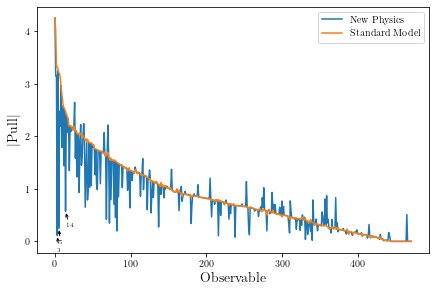

In [ ]:
SMEFT19.plots.compare_plot(SMEFT19.scenarios.rotBII, '../data/ellipses/rotBII.yaml', '../data/plots/rotBII', 1.5)

In [ ]:
evo = [0]*5
ranges = [[-0.08, 0.08], [-0.18, 0.07], [-0.025, 0.025], [-0.07, 0.12], [-0.6,2.8]]
labels = [r'$C$', r'$\alpha^\ell$', r'$\beta^\ell$', r'$\alpha^q$', r'$\beta^q$']
labelsplain = ['C', 'alphal', 'betal', 'alphaq', 'betaq']
fits = ['RK', 'RD', 'LFV', 'global']
fitcodes = {'RK':'likelihood_lfu_fcnc.yaml', 'RD':'likelihood_rd_rds.yaml',
            'LFV':'likelihood_lfv.yaml', 'global':'global'}
fitlabels = {'RK':r'$R_{K^{(*)}}$', 'RD':r'$R_{D^{(*)}}$',  'LFV':'LFV', 'global':'Global'}
fitcolors = {'RK':(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
             'RD':(0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
             'LFV':(0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
             'global':(1.0, 0.4980392156862745, 0.0)}

In [ ]:
for i in range(1):
    xvalues = bf2[i] + np.linspace(ranges[i][0], ranges[i][1], 200)
    evoi = []
    for x in xvalues:
        bfx = bf2.copy()
        bfx[i] = x
        evoi.append(SMEFT19.likelihood_fits(bfx, SMEFT19.scenarios.rotBII))
    evo[i] = evoi

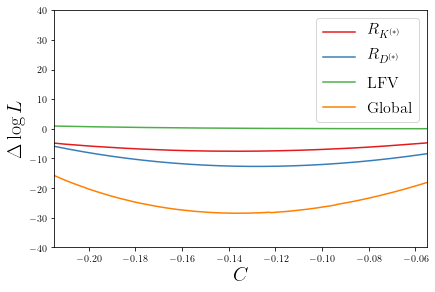

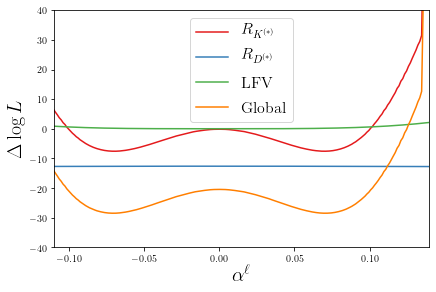

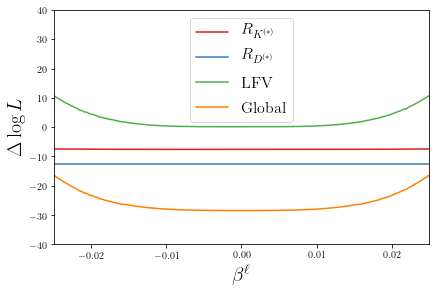

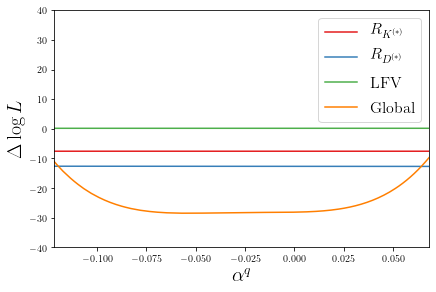

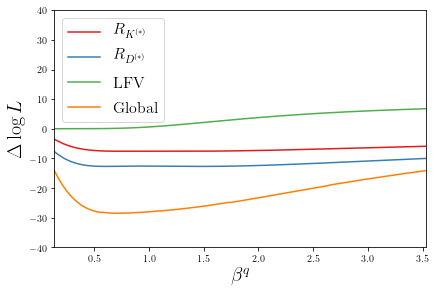

In [ ]:
for i in range(0,5):
    xvalues = bf2[i] + np.linspace(ranges[i][0], ranges[i][1], 200)
    fig = plt.figure()
    for f in fits:
        plt.plot(xvalues, -pd.DataFrame(evo[i])[fitcodes[f]], lw=1.5, label=fitlabels[f], color=fitcolors[f])
    plt.ylim([-40,40])
    plt.xlim([bf2[i]+ranges[i][0], bf2[i]+ranges[i][1]])
    plt.legend(fontsize=16)
    plt.xlabel(labels[i], fontsize=20)
    plt.ylabel(r'$\Delta \log L$', fontsize=20)
    plt.tight_layout(pad=0.5)
    fig.savefig(f'../data/plots/evoplot_{labelsplain[i]}.pdf')
    fig.savefig(f'../data/plots/evoplot_{labelsplain[i]}.pgf')

## Leptoquark couplings

In [ ]:
SMEFT19.scenarios.rot2lqU1(bf)

Casting complex values to real discards the imaginary part


matrix([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.15983823e-13, 4.95470395e-01],
        [0.00000000e+00, 1.37075902e-13, 5.85573483e-01]])

In [ ]:
SMEFT19.scenarios.rot2lqU1(bfII)

matrix([[-2.26642195e-03, -3.75638371e-10, -3.25077733e-02],
        [ 3.19164771e-02,  5.28985941e-09,  4.57784837e-01],
        [ 4.37486380e-02,  7.25093010e-09,  6.27496044e-01]])